In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
#import spacy
import gensim
import tensorflow as tf
import keras
import sklearn
import os
from sklearn.ensemble import IsolationForest
# Additional libraries for specific tasks
import scipy
import statsmodels
import plotly
import networkx

In [27]:
rfm = pd.read_csv("/project/data/BriefReasonForMatching-20230806.csv")
rfm

,Lead,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1"
0,Gideon Hyde,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,0,VALID
1,Gideon Hyde,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,1,VALID
2,Gideon Hyde,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,1,VALID
3,Gideon Hyde,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,1,VALID
4,Gideon Hyde,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,1,VALID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Paul Bowman,Veezu,Social Media Veezu,Spin Brands,0,0.0,0,1,0,0,0,1,VALID
276,Paul Bowman,Wave,Social and web plan,NMD+,0,1.0,0,0,0,0,0,0,VALID
277,Paul Bowman,Wave,Social and web plan,Polar Media House,0,0.0,0,0,0,0,1,0,VALID
278,Paul Bowman,Wave,SME engagement,NMD+,0,1.0,0,0,0,0,0,0,VALID


In [28]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead                                                280 non-null    object 
 1   Client                                              280 non-null    object 
 2   Brief                                               280 non-null    object 
 3   Agency                                              280 non-null    object 
 4   Project extension 
with same agency                 280 non-null    int64  
 5   Client selected agency
themselves from marketplace  279 non-null    float64
 6   Right geography
 / time zone                        280 non-null    int64  
 7   Strong skill
set match                              280 non-null    int64  
 8   Deep / relevant
sector expertise                    280 non-null    int64  
 9  

## Value Counts

In [6]:
print(rfm["Lead"].value_counts())

Paul Bowman          64
Robin Scarborough    50
Hannah Fraser        48
Phil Kohler          40
Peter Sayburn        33
Kate Walker          21
Gideon Hyde          14
George Patten         6
David Cowser          4
Name: Lead, dtype: int64


In [7]:
print(rfm["Client"].value_counts())

Aviva                   88
TAL                     25
Biffa                   23
JLR                     19
MA Financial            14
AXA                     12
News Corp (Aus)         12
Oxford Properties        9
Gala Games               8
L&G                      6
HSBC                     5
CFS                      5
TotalEnergies            4
Wave                     4
Global Sisters           4
Google                   3
Allego                   3
Veezu                    3
Momentum GB              3
Fenergo                  3
D&G                      3
Portevo                  3
Auspaynet                3
TfNSW                    3
Superdrug                3
Cedar                    2
Silverchain              2
Protective Life          2
Fletchers Solicitors     2
Aegon                    2
Tesco Bank               1
Snugg Energy             1
Name: Client, dtype: int64


### column: Client selected agency\nthemselves from marketplace

In [8]:
print(rfm["Client selected agency\nthemselves from marketplace"].value_counts())

0.0    238
1.0     41
Name: Client selected agency\nthemselves from marketplace, dtype: int64


In [9]:
#handling missing values for own selection column
# Identify columns with missing values
columns_with_missing = rfm.columns[rfm.isnull().any()]

# Print the count of missing values in each column
missing_values_count = rfm[columns_with_missing].isnull().sum()
print(missing_values_count)

Client selected agency\nthemselves from marketplace    1
dtype: int64


In [10]:
#viewing the row with missing value
rows_with_missing = rfm[rfm.isnull().any(axis=1)]

# Print the rows with missing values
rows_with_missing

,Lead,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1"
44,Paul Bowman,Aviva,Adivsor Messaging,Reed Words,1,NaN,0,0,0,0,0,0,VALID


row cannot be dropped since it is material to the algorithm

In [11]:
#Nan filled with 0 as per speaking to the company 
rfm['Client selected agency\nthemselves from marketplace'] = rfm['Client selected agency\nthemselves from marketplace'].fillna(0)

In [12]:
columns_with_missing = rfm.columns[rfm.isnull().any()]
columns_with_missing

Index([], dtype='object')

## Exploratory Data Analysis (EDA):
1. Univariate Analysis: Analyze the distribution of each column in your dataset using methods such as .describe() for basic statistics and visualization techniques like histograms or bar plots.
2. Bivariate Analysis: Examine the relationship between different pairs of variables. Since most of your variables are binary, you might want to calculate correlations between variables or use cross-tabulation to understand the relationships.
3. Multivariate Analysis: Look at the interactions between multiple variables at once. You can use techniques such as correlation matrix and heat maps.

In [13]:
rfm.describe()

,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.114286,0.146429,0.396429,0.732143,0.321429,0.328571,0.385714,0.507143
std,0.318728,0.354168,0.490031,0.443636,0.467861,0.470535,0.487635,0.500844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


count             280
unique              9
top       Paul Bowman
freq               64
Name: Lead, dtype: object


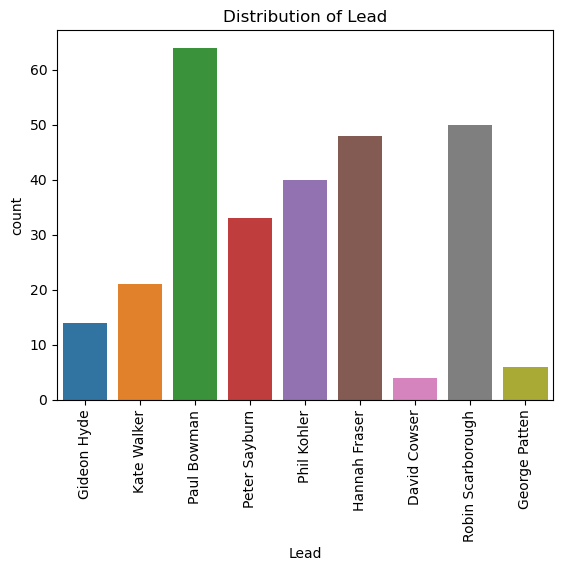

count       280
unique       32
top       Aviva
freq         88
Name: Client, dtype: object


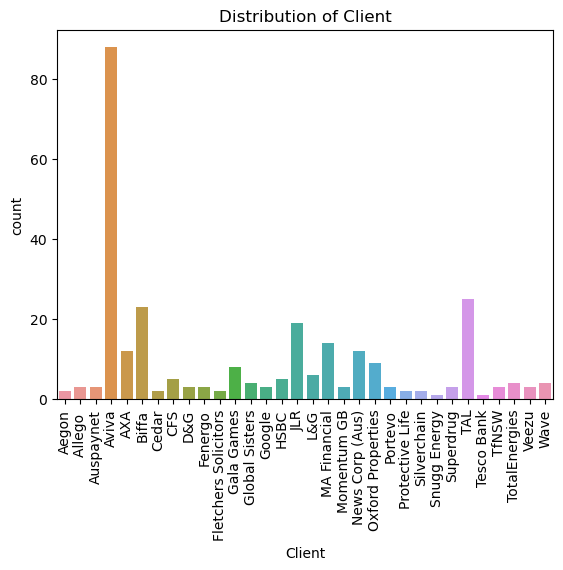

count                          280
unique                         156
top       Retail Brand Positioning
freq                             6
Name: Brief, dtype: object


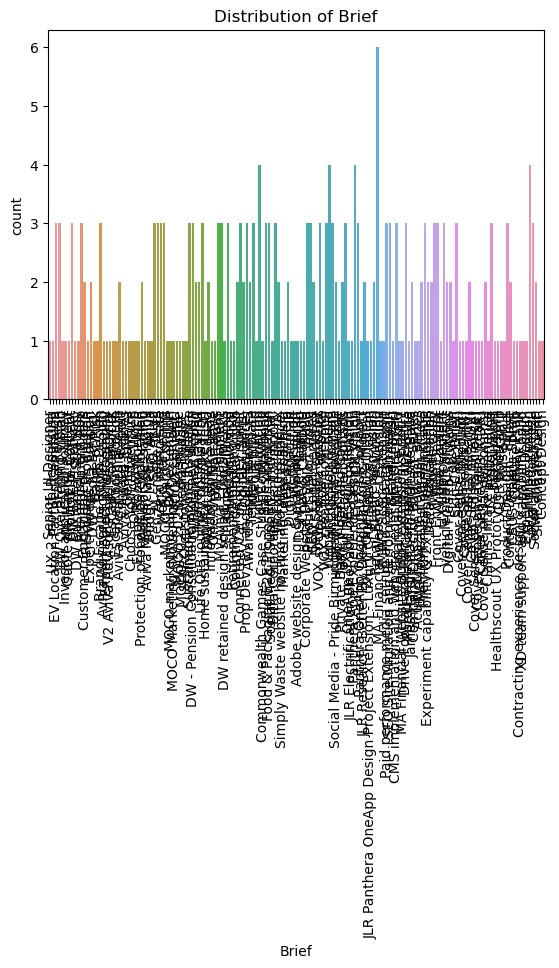

count                          280
unique                         110
top       Shoreditch Design Studio
freq                            23
Name: Agency, dtype: object


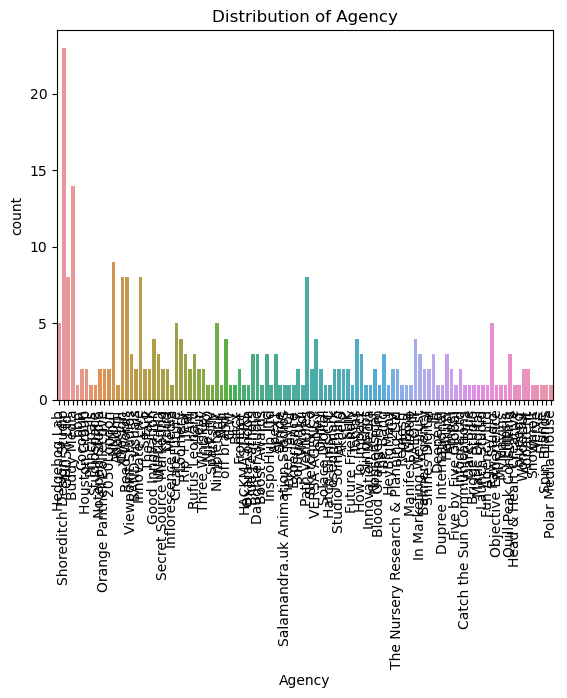

count    280.000000
mean       0.114286
std        0.318728
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Project extension \nwith same agency, dtype: float64


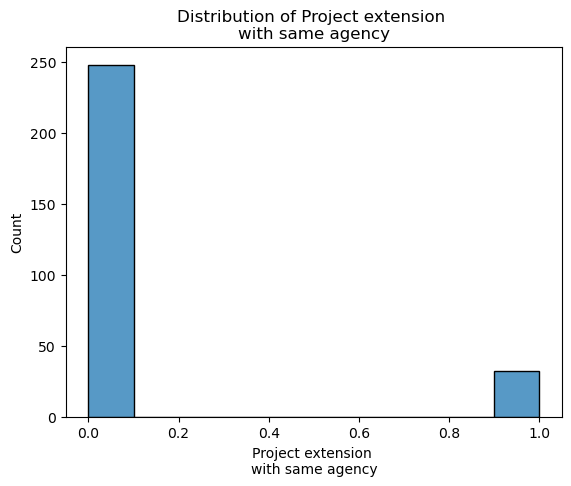

count    280.000000
mean       0.146429
std        0.354168
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Client selected agency\nthemselves from marketplace, dtype: float64


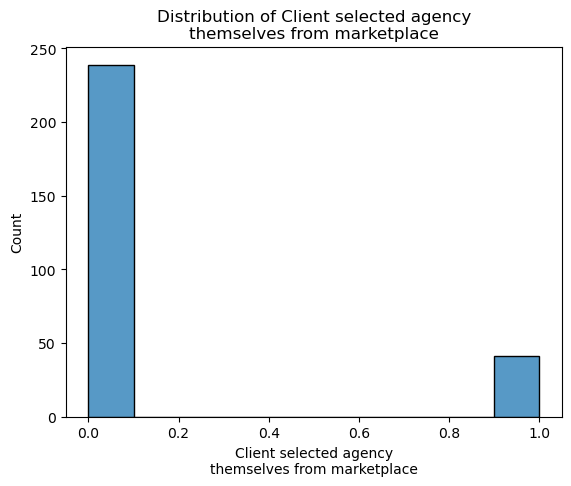

count    280.000000
mean       0.396429
std        0.490031
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Right geography\n / time zone, dtype: float64


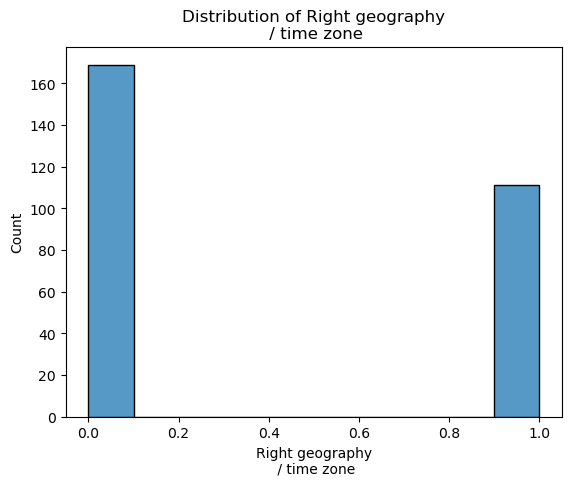

count    280.000000
mean       0.732143
std        0.443636
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Strong skill\nset match, dtype: float64


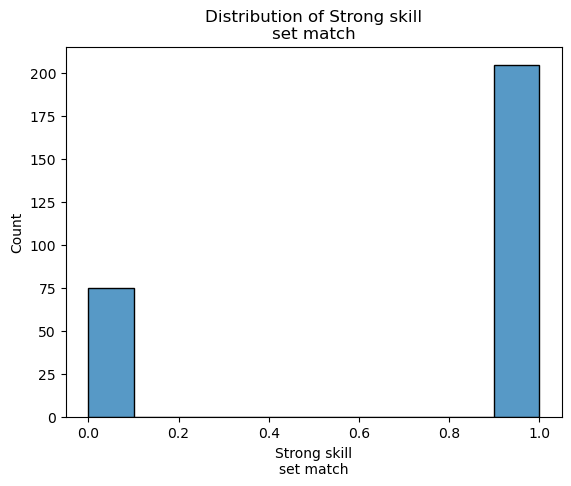

count    280.000000
mean       0.321429
std        0.467861
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Deep / relevant\nsector expertise, dtype: float64


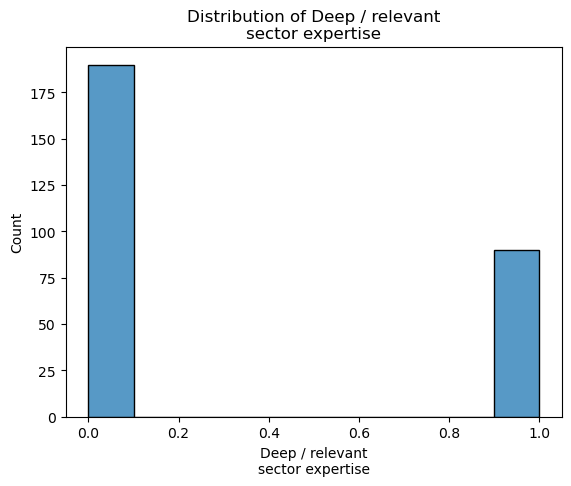

count    280.000000
mean       0.328571
std        0.470535
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Good cultural fit, dtype: float64


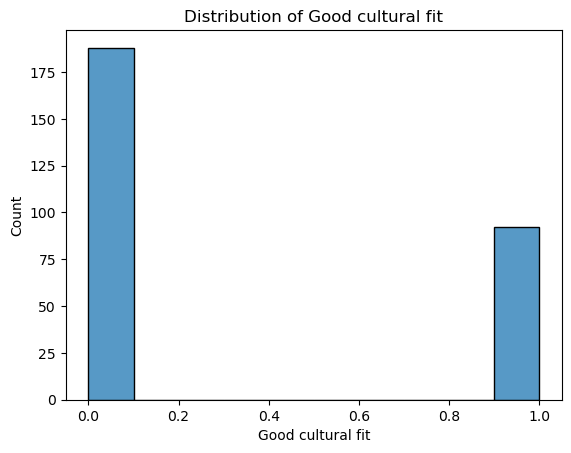

count    280.000000
mean       0.385714
std        0.487635
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Right price level, dtype: float64


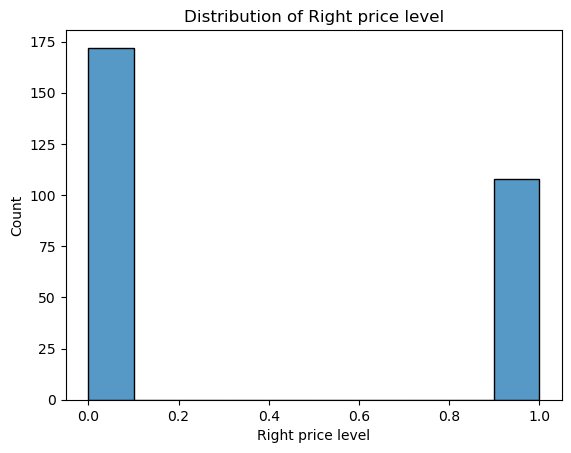

count    280.000000
mean       0.507143
std        0.500844
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Strong track record, dtype: float64


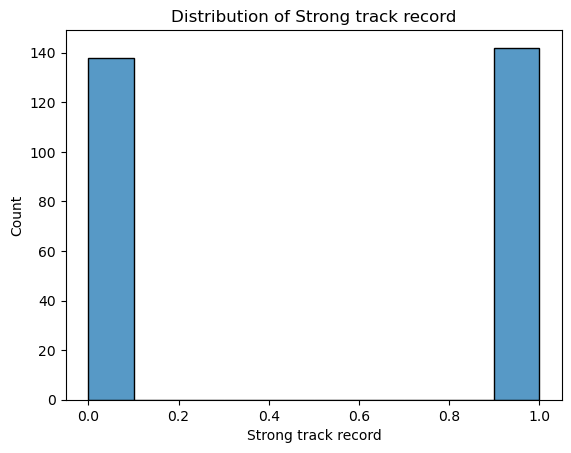

count       280
unique        2
top       VALID
freq        277
Name: Left marked with 0 or 1, \nmust have at least one 1, dtype: object


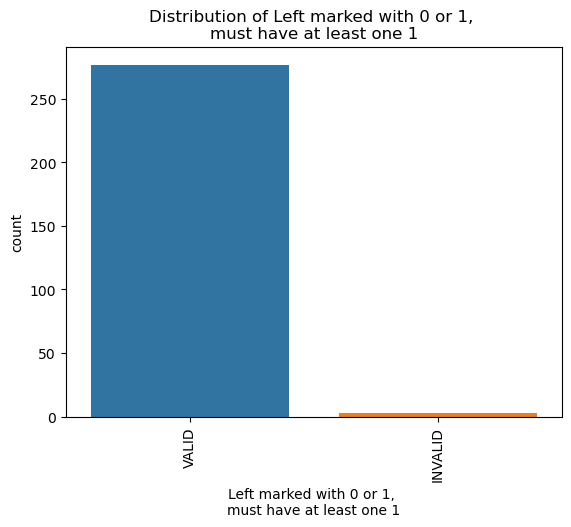

In [14]:
# EDA - Univariate Analysis
column_names = rfm.columns.tolist()
for column in column_names:
    print(rfm[column].describe())  # Basic statistics for each column
    plt.figure()
    if rfm[column].dtype == 'object':  # Categorical variable
        sns.countplot(data=rfm, x=column)
        plt.xticks(rotation=90)
    else:  # Numerical variable
        sns.histplot(data=rfm, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

       Project extension \nwith same agency  \
count                            280.000000   
mean                               0.114286   
std                                0.318728   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       Client selected agency\nthemselves from marketplace  \
count                                         280.000000     
mean                                            0.146429     
std                                             0.354168     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.000000     
75%                                             0.000000     
max                                             1.000000     

       Right geog

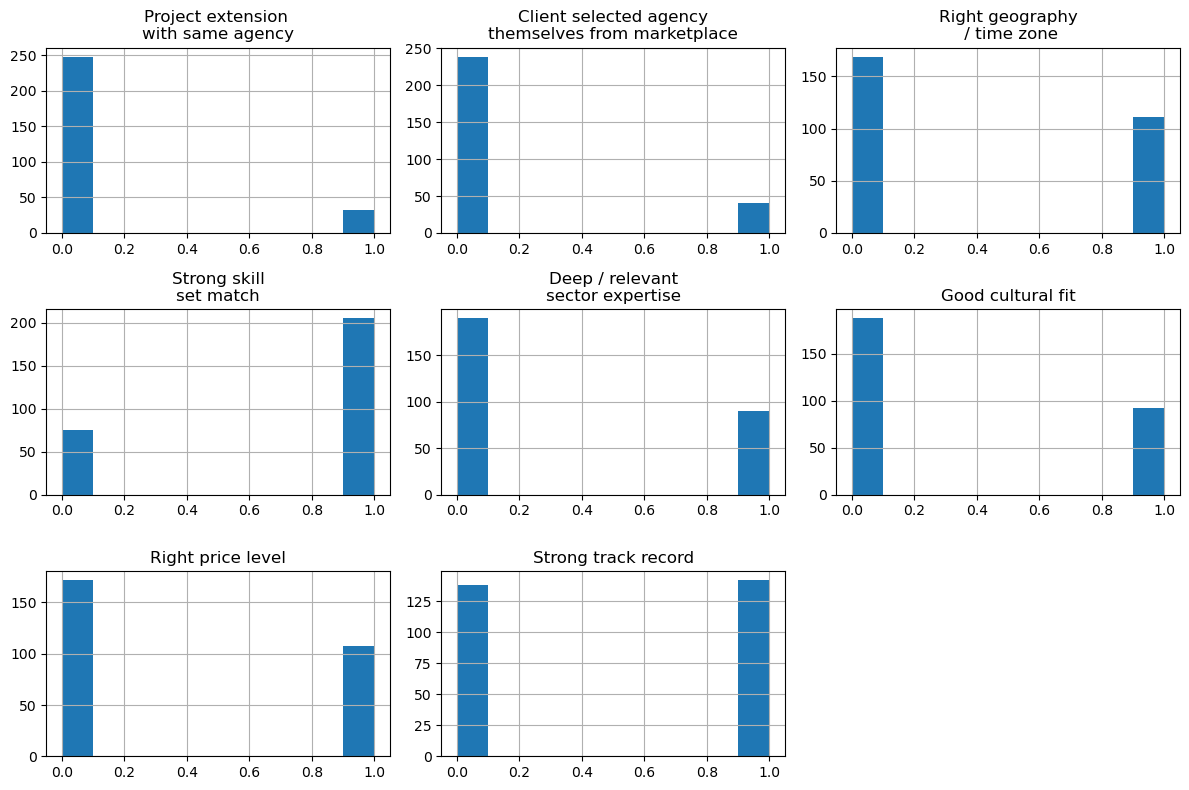

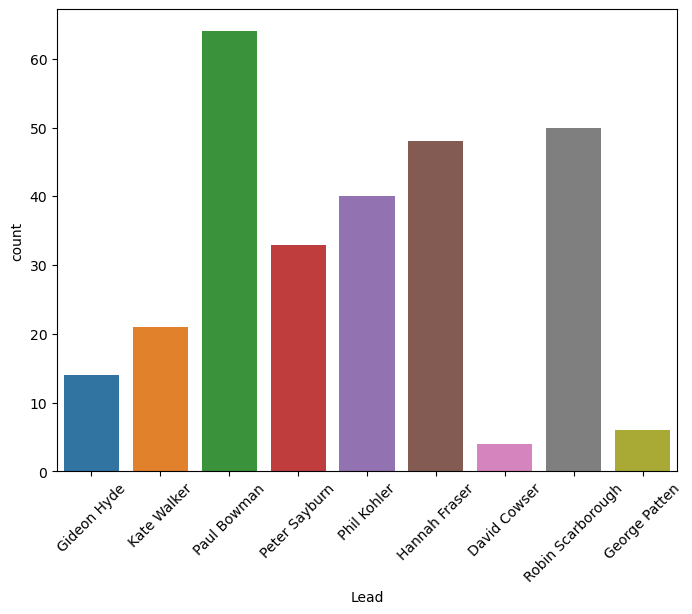

In [16]:
# Descriptive statistics
print(rfm.describe())

# Histogram for each column
rfm.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Bar plot for Lead column value counts
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm, x='Lead')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

/tmp/ipykernel_313/324072907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rfm.corr(), annot=True, cmap='mako')  # Correlation matrix


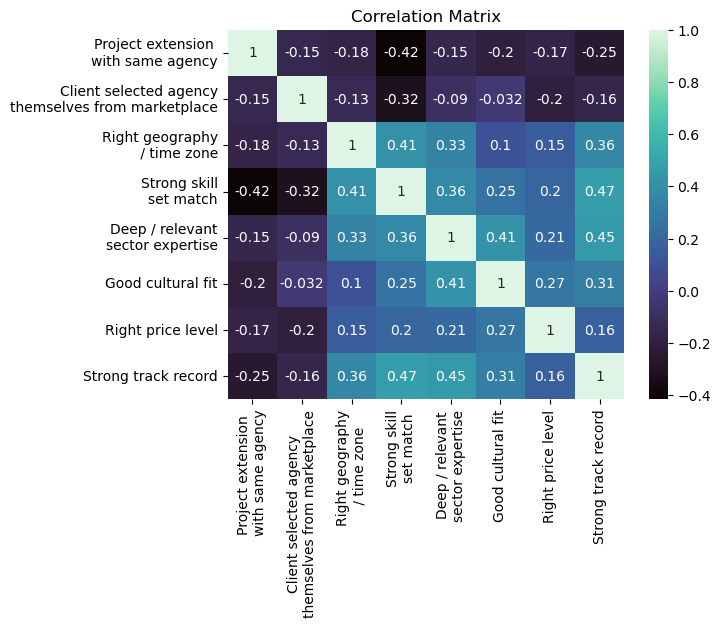

In [17]:
#Bivariate Analysis
sns.heatmap(rfm.corr(), annot=True, cmap='mako')  # Correlation matrix
plt.title('Correlation Matrix')
plt.show()


The significance of the cross-tabulation (also known as a contingency table) between the 'Lead' and 'Agency' variables lies in understanding the relationship and association between these two categorical variables. Cross-tabulation provides a tabular summary that shows the frequency distribution of the variables' categories and allows us to analyze the interactions between them.

insights that can be derived:

1. Frequency Distribution: The cross-tabulation reveals the count of occurrences for each combination of 'Lead' and 'Agency', providing an overview of how many times each lead worked with each agency.

2. Association Strength: The distribution in the cross-tabulation can help identify whether certain leads tend to work more frequently with specific agencies. The strength of association can be inspected by comparing the counts across different categories and identifying any notable patterns or discrepancies.

3. Dependency Analysis: Cross-tabulation allows to analyze the dependence or independence between the 'Lead' and 'Agency' variables. By comparing the frequencies of each category combination with the expected frequencies under the assumption of independence, can determine if there is a significant relationship between the two variables.

4. Decision-Making: The cross-tabulation can assist in decision-making processes. For example, it can help identify which leads have a higher likelihood of working with particular agencies, allowing to allocate resources, personalize communication, or tailor marketing strategies accordingly.

In summary, the cross-tabulation between 'Lead' and 'Agency' provides a clear and concise summary of the relationship and association between these categorical variables. It helps uncover patterns, dependencies, and potential insights that can guide decision-making processes or further analysis.

# notes 
### do we have a much higher waiting on 

pair it against winning agency? ok now, we comapred the 3/8 matrix against winning agency--what are the best correlation to look at?
we found that if theres a strong 

probably look at an agency score system based on 6 factors-- and location? industries and skills

those two factors can basically be ignored, given how often theyve worked previously, would be an extension 

In [18]:
# Cross-tabulation between 'Lead' and 'Agency'
cross_tab = pd.crosstab(rfm['Lead'], rfm['Agency'])
cross_tab

Agency,2050London,2CV,Akcelo,Ampel,Apadmi,Apex1,Apparent,Balmer Agency,Blicx,Blood Orange Film,...,VERSA AGENCY,Verve,Viewpoint Studios,Vivaldi,Wonderful,bbp,blueegg,infogr8 Ltd,off brand.,xDesign
Lead,,,,,,,,,,,,,,,,,,,,,
David Cowser,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
George Patten,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gideon Hyde,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,0
Hannah Fraser,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Kate Walker,0,0,0,2,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
Paul Bowman,1,0,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,2,0,3
Peter Sayburn,0,0,0,0,0,2,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
Phil Kohler,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,4
Robin Scarborough,0,0,1,0,0,0,2,0,0,0,...,3,0,0,0,2,0,1,0,0,0


## Data Preprocessing

In [19]:
# Encoding using (One-Hot Encoding) for "lead"
rfm_encoded = pd.get_dummies(rfm, columns=['Lead'], drop_first=True)
rfm_encoded.head()

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1",Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
0,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,0,VALID,0,1,0,0,0,0,0,0
1,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
2,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
3,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,1,VALID,0,1,0,0,0,0,0,0
4,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,1,VALID,0,1,0,0,0,0,0,0


In [20]:
# Cleaning
# Outlier detection and handling (assuming numerical columns)
numerical_columns = rfm_encoded.select_dtypes(include='number').columns
outliers = rfm_encoded[numerical_columns].apply(lambda x: x[(x - x.mean()).abs() > 3 * x.std()])
outliers_index = outliers.dropna().index
rfm_encoded = rfm_encoded.drop(outliers_index)

# Printing updated dataset
rfm_encoded.head()

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1",Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
0,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,0,VALID,0,1,0,0,0,0,0,0
1,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
2,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
3,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,1,VALID,0,1,0,0,0,0,0,0
4,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,1,VALID,0,1,0,0,0,0,0,0


In [21]:
outliers_index

Int64Index([], dtype='int64')

as per the above there are no outliers present in the data 

In [22]:
# Duplicated Rows
duplicates = rfm_encoded.duplicated()
print(f"Number of duplicated rows: {sum(duplicates)}")
rfm = rfm.drop_duplicates()

Number of duplicated rows: 0


## Feature Engineering

In [23]:
# Data Manipulation
rfm['Total Matching Reasons'] = rfm_encoded.iloc[:, 4:11].sum(axis=1)
rfm_encoded.head()

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1",Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
0,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,0,VALID,0,1,0,0,0,0,0,0
1,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
2,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
3,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,1,VALID,0,1,0,0,0,0,0,0
4,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,1,VALID,0,1,0,0,0,0,0,0


In [24]:
rfm_encoded.describe()

,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.114286,0.146429,0.396429,0.732143,0.321429,0.328571,0.385714,0.507143,0.021429,0.050000,0.171429,0.075000,0.228571,0.117857,0.142857,0.178571
std,0.318728,0.354168,0.490031,0.443636,0.467861,0.470535,0.487635,0.500844,0.145067,0.218335,0.377558,0.263863,0.420664,0.323016,0.350554,0.383679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Anomaly Detection

(however unsure if it even makes sense to go about this in terms of how the data is)

detection using statistical methods liek z score or calculation through inter quartile ranges does not make sense since data is largely binary and categorical.

could work well for univariate data but can be less useful for multivariate data where outliers might be a combination of values across attributes.

### using isolation forest 

In [25]:
# Select numerical columns for anomaly detection
numerical_columns = rfm_encoded.select_dtypes(include='number').columns

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the numerical data
isolation_forest.fit(rfm_encoded[numerical_columns])

# Predict the anomaly scores (-1 for anomalies, 1 for normal instances)
anomaly_scores = isolation_forest.predict(rfm_encoded[numerical_columns])

# Create a mask for anomalies (-1) and normal instances (1)
anomaly_mask = anomaly_scores == -1

# Filter the anomalies based on the mask
anomalies = rfm_encoded[anomaly_mask]

# Print the detected anomalies
anomalies

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,"Left marked with 0 or 1, \nmust have at least one 1",Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
0,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,0,VALID,0,1,0,0,0,0,0,0
1,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
2,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,1,VALID,0,1,0,0,0,0,0,0
3,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,1,VALID,0,1,0,0,0,0,0,0
4,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,1,VALID,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,TotalEnergies,Brand positioning,2CV,0,0.0,1,1,1,0,0,1,VALID,0,1,0,0,0,0,0,0
270,TotalEnergies,Brand positioning,Verve,0,0.0,1,1,1,0,1,1,VALID,0,1,0,0,0,0,0,0
271,TotalEnergies,Brand positioning,Flume,0,0.0,1,1,0,0,1,1,VALID,0,1,0,0,0,0,0,0
272,TotalEnergies,Brand positioning,The Nursery Research & Planning Ltd,0,0.0,1,1,1,0,1,1,VALID,0,1,0,0,0,0,0,0


In [51]:
rfm_encoded 

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,...,"Left marked with 0 or 1, \nmust have at least one 1",Total Matching Reasons,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough
0,Aegon,Senior UI Designer,Hedgehog Lab,0,0.0,1,1,1,0,0,...,VALID,3.0,0,1,0,0,0,0,0,0
1,Aegon,UX 2 month Resourcing,Shoreditch Design Studio,0,0.0,1,1,1,1,0,...,VALID,4.0,0,1,0,0,0,0,0,0
2,Allego,EV Location Partner Campaign,GH05T Ltd.,0,0.0,1,1,1,1,0,...,VALID,4.0,0,1,0,0,0,0,0,0
3,Allego,EV Location Partner Campaign,Buddy Media,0,0.0,1,1,1,0,0,...,VALID,3.0,0,1,0,0,0,0,0,0
4,Allego,EV Location Partner Campaign,bbp,0,0.0,1,0,0,1,0,...,VALID,2.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Veezu,Social Media Veezu,Spin Brands,0,0.0,0,1,0,0,0,...,VALID,1.0,0,0,0,0,1,0,0,0
276,Wave,Social and web plan,NMD+,0,1.0,0,0,0,0,0,...,VALID,1.0,0,0,0,0,1,0,0,0
277,Wave,Social and web plan,Polar Media House,0,0.0,0,0,0,0,1,...,VALID,1.0,0,0,0,0,1,0,0,0
278,Wave,SME engagement,NMD+,0,1.0,0,0,0,0,0,...,VALID,1.0,0,0,0,0,1,0,0,0


In [24]:
#file download
rfm_encoded.to_csv("rfm_encoded.csv", index=False)